# Assignment 7 (Clustering) Q1.Airlines

##  Q1. Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. 

## Data Description:
 
## The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

## ID --Unique ID

## Balance--Number of miles eligible for award travel

## Qual_mile--Number of miles counted as qualifying for Topflight status

## cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
## cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
## cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

## 1 = under 5,000
## 2 = 5,000 - 10,000
## 3 = 10,001 - 25,000
## 4 = 25,001 - 50,000
## 5 = over 50,000

## Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

## Bonus_trans--Number of non-flight bonus transactions in the past 12 months

## Flight_miles_12mo--Number of flight miles in the past 12 months

## Flight_trans_12--Number of flight transactions in the past 12 months

## Days_since_enrolled--Number of days since enrolled in flier program

## Award--whether that person had award flight (free flight) or not


 

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
# Importing Dataset
airline_df=pd.read_csv('EastWestAirlines.csv')
airline_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline_df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Correlation : 
                         ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.243737   -0.019374  -0.224465   0.020291   
Balance           -0.243737  1.000000    0.108722   0.338344  -0.008804   
Qual_miles        -0.019374  0.108722    1.000000   0.007931  -0.013923   
cc1_miles         -0.224465  0.338344    0.007931   1.000000  -0.068223   
cc2_miles          0.020291 -0.008804   -0.013923  -0.068223   1.000000   
cc3_miles         -0.014707  0.035243   -0.007779   0.060555  -0.006166   
Bonus_miles       -0.203012  0.403487    0.031021   0.825200  -0.003969   
Bonus_trans       -0.146915  0.324935    0.050725   0.608943   0.064399   
Flight_miles_12mo -0.031013  0.217551    0.126774   0.037370   0.010598   
Flight_trans_12   -0.052096  0.255700    0.144004   0.041333   0.028284   
Days_since_enroll -0.964988  0.263129    0.017312   0.230849  -0.005807   
Award?            -0.177901  0.178494    0.095256   0.335457   0.005332   

        

<AxesSubplot:>

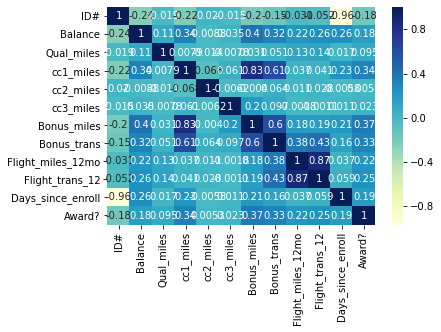

In [5]:
airline_corr = airline_df.corr()
print('Correlation : \n',airline_corr)
sns.heatmap(airline_corr,cmap='YlGnBu',annot=True)

In [6]:
airline_df1=airline_df.drop(['ID#'],axis=1)
airline_df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [7]:
# Normalizing Heterogenous Numerical Data 
airline_norm=pd.DataFrame(normalize(airline_df1),columns=airline_df1.columns)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.000000,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.000000,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.000000,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.000000,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.000000,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
5,0.921066,0.000000,0.000056,0.000056,0.000056,0.000000,0.000000,0.000000,0.000000,0.389406,0.000000
6,0.948504,0.000000,0.000034,0.000011,0.000011,0.306979,0.000279,0.000000,0.000000,0.078124,0.000000
7,0.922856,0.000000,0.000044,0.000044,0.000044,0.232307,0.000177,0.011062,0.000044,0.306999,0.000044
8,0.999831,0.000000,0.000007,0.000005,0.000002,0.003956,0.000097,0.008689,0.000027,0.015681,0.000002
9,0.963153,0.000000,0.000028,0.000009,0.000009,0.261097,0.000257,0.010563,0.000028,0.063662,0.000009


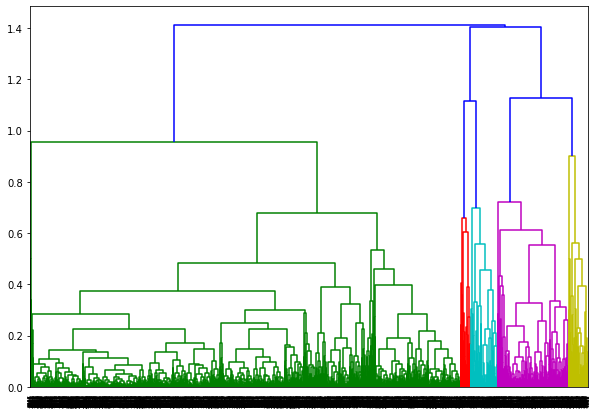

In [8]:
# Creating Dendrograms
plt.figure(figsize=(10, 7))  
dendograms_val=sch.dendrogram(sch.linkage(airline_norm,'complete'))

In [9]:
# Creating Clusters 
clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
clusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [10]:
y = pd.DataFrame(clusters.fit_predict(airline_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [11]:
# Adding Clusters to Dataset
airline_df1['clustersid'] = clusters.labels_
airline_df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,16420,0,1,1,1,0,0,0,0,6942,0,2
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,4
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2


In [12]:
airline_df1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


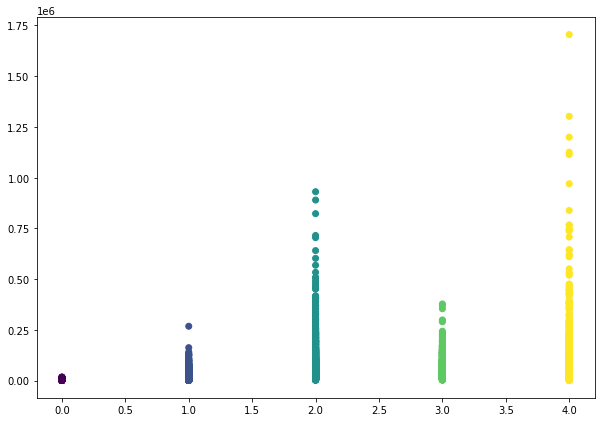

In [13]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline_df1['clustersid'],airline_df1['Balance'], c = clusters.labels_)